In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv(r"C:\Users\Mohd Shadab\Downloads\Projects\Machine Learning\Assesment Datasets\Mercedes benz\train.csv")
test=pd.read_csv(r"C:\Users\Mohd Shadab\Downloads\Projects\Machine Learning\Assesment Datasets\Mercedes benz\test.csv")

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)
print(test.shape)

(4209, 378)
(4209, 377)


In [6]:
#Checking the zero variance columns on train set

train.var().sort_values().head(12)

C:\Users\MOHDSH~1\AppData\Local\Temp/ipykernel_24080/545200058.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.var().sort_values().head(12)


X289    0.0
X330    0.0
X268    0.0
X347    0.0
X107    0.0
X235    0.0
X233    0.0
X290    0.0
X11     0.0
X297    0.0
X293    0.0
X93     0.0
dtype: float64

In [7]:
#Checking the zero variance columns on train set

train.var().sort_values().head(12).index

C:\Users\MOHDSH~1\AppData\Local\Temp/ipykernel_24080/4242988739.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.var().sort_values().head(12).index


Index(['X289', 'X330', 'X268', 'X347', 'X107', 'X235', 'X233', 'X290', 'X11',
       'X297', 'X293', 'X93'],
      dtype='object')

In [8]:
train.drop(['X289', 'X330', 'X268', 'X347', 'X107', 'X235', 'X233', 'X290', 'X11',
       'X297', 'X293', 'X93'],axis=1,inplace=True)

In [9]:
train.shape #All 12 zero variance columns have been removed

(4209, 366)

In [10]:
#Checking the zero variance columns on test set

test.var().sort_values().head(5)

C:\Users\MOHDSH~1\AppData\Local\Temp/ipykernel_24080/3752438548.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.var().sort_values().head(5)


X295    0.0
X369    0.0
X296    0.0
X257    0.0
X258    0.0
dtype: float64

In [11]:
id_test=train['ID']

In [12]:
test.drop(['X295', 'X369', 'X296', 'X257', 'X258'],axis=1,inplace=True)

In [13]:
test.shape

(4209, 372)

In [14]:
#It is better to drop all the columns from both the dataset that have the variance zero.

In [15]:
train.drop(['ID','X295', 'X369', 'X296', 'X257', 'X258'],axis=1,inplace=True)
test.drop(['ID','X289', 'X330', 'X268', 'X347', 'X107', 'X235', 'X233', 'X290', 'X11',
       'X297', 'X293', 'X93'],axis=1,inplace=True)

In [16]:
print(train.shape)
print(test.shape)

(4209, 360)
(4209, 359)


In [17]:
#Checking for nulls

In [18]:
train.isnull().sum() #No nulls present

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 360, dtype: int64

In [19]:
test.isnull().sum() # no nulls present

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 359, dtype: int64

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, y to X385
dtypes: float64(1), int64(351), object(8)
memory usage: 11.6+ MB


In [21]:
train.describe()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
test.describe()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.019007,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,0.111665,0.139463,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,0.136565,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,0.314992,0.346470,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Defining input and target variables for train

x=train.drop(['y'],axis=1)
y=train['y']

In [24]:
# Applying label encoder

#Train dataset

In [25]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le_object = preprocessing.LabelEncoder()

x = x.apply(le_object.fit_transform)

In [26]:
x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Applying label encoder

#Test dataset

In [28]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le_object = preprocessing.LabelEncoder()

test = test.apply(le_object.fit_transform)

In [29]:
test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
#Dimensionality reduction using PCA

#let's check the variance for different number of PCA component

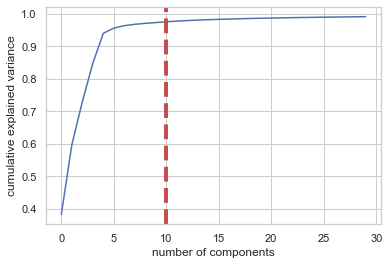

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.383350,0.383350
1,0.597232,0.213882
2,0.729852,0.132620
3,0.848119,0.118267
4,0.940180,0.092061
5,0.956086,0.015906
6,0.963531,0.007445
7,0.967868,0.004337
8,0.970808,0.002940
9,0.973226,0.002418


In [31]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=30)
pca_test.fit(x)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(11))

In [32]:
#Looking at the dataframe above, when we use PCA to reduce our 360 predicting variables down to 10 components, 
#we can still explain over 97.5% of the variance. The other components explain less than 5% of the variance, 
#so we can cut them. Using this logic, we will use PCA to reduce the number of components to 10 

In [33]:
pca = PCA(n_components=10)
pca.fit(x)
x_pca = pca.transform(x)
test_pca = pca.transform(test)

In [34]:
#Following table provides

In [35]:
 pca_dims = []
for i in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(i))
pca_test_df = pd.DataFrame(pca_test.components_, columns=x.columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
X0,-0.931138,2.630463e-01,0.140346,0.199746,-0.037053,0.005557,-0.006142,-0.024084,-0.005216,0.009357
X1,0.245494,-1.921834e-02,0.551247,0.784526,-0.065728,-0.037164,0.065048,0.021833,0.067207,0.017442
X2,0.257714,9.597208e-01,0.002154,-0.049422,0.071217,0.024374,-0.026216,-0.010843,-0.004864,-0.013528
X3,0.009483,-2.031379e-02,0.020867,0.038683,-0.006226,0.019944,-0.801325,0.104253,-0.077219,-0.044952
X4,-0.000097,5.773992e-05,0.000209,-0.000334,-0.000095,-0.000661,-0.000687,-0.000353,0.000107,-0.001896
...,...,...,...,...,...,...,...,...,...,...
X380,0.000203,-5.711757e-05,-0.000139,-0.000443,0.000187,0.000488,0.001626,0.000204,-0.000217,0.003681
X382,0.000471,2.695288e-05,0.000296,0.001073,-0.000027,-0.001940,0.002230,0.003483,0.000935,-0.003759
X383,0.000003,-9.238587e-05,-0.000114,-0.000112,0.000231,0.000329,0.000906,-0.000203,-0.000152,0.000168
X384,-0.000010,-5.160618e-07,0.000046,0.000040,0.000021,-0.000193,-0.000041,-0.000134,0.000016,0.000191


In [36]:
#!pip install xgboost

In [37]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


x_train, x_valid, y_train, y_valid = train_test_split(
        x_pca, 
        y, test_size=0.2, 
        random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test_pca)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

# Step12: Predict your test_df values using xgboost

p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.to_csv('xgb.csv', index=False)

[15:45:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.14997	train-r2:-58.35491	valid-rmse:98.26194	valid-r2:-67.63611
[10]	train-rmse:81.29134	train-r2:-38.89881	valid-rmse:80.35925	valid-r2:-44.90434
[20]	train-rmse:66.73840	train-r2:-25.89199	valid-rmse:65.77869	valid-r2:-29.75760
[30]	train-rmse:54.89656	train-r2:-17.19541	valid-rmse:53.90560	valid-r2:-19.65617
[40]	train-rmse:45.27761	train-r2:-11.37766	valid-rmse:44.23706	valid-r2:-12.91088
[50]	train-rmse:37.48574	train-r2:-7.48406	valid-rmse:36.39335	valid-r2:-8.41513


D:\Jupyter Notebook\lib\site-packages\xgboost\core.py:568: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
D:\Jupyter Notebook\lib\site-packages\xgboost\training.py:35: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[60]	train-rmse:31.20087	train-r2:-4.87767	valid-rmse:30.04970	valid-r2:-5.41892
[70]	train-rmse:26.16084	train-r2:-3.13214	valid-rmse:24.95482	valid-r2:-3.42681
[80]	train-rmse:22.14837	train-r2:-1.96179	valid-rmse:20.88345	valid-r2:-2.10018
[90]	train-rmse:18.98325	train-r2:-1.17577	valid-rmse:17.68240	valid-r2:-1.22262
[100]	train-rmse:16.50303	train-r2:-0.64437	valid-rmse:15.20489	valid-r2:-0.64342
[110]	train-rmse:14.58401	train-r2:-0.28418	valid-rmse:13.31168	valid-r2:-0.25964
[120]	train-rmse:13.13067	train-r2:-0.04099	valid-rmse:11.88371	valid-r2:-0.00389
[130]	train-rmse:12.03750	train-r2:0.12513	valid-rmse:10.84453	valid-r2:0.16401
[140]	train-rmse:11.22446	train-r2:0.23932	valid-rmse:10.09864	valid-r2:0.27505
[150]	train-rmse:10.62758	train-r2:0.31807	valid-rmse:9.57586	valid-r2:0.34816
[160]	train-rmse:10.19127	train-r2:0.37291	valid-rmse:9.21803	valid-r2:0.39597
[170]	train-rmse:9.87060	train-r2:0.41175	valid-rmse:8.97622	valid-r2:0.42724
[180]	train-rmse:9.63369	train-r2: